# <OpenCV로 사진 속 얼굴 및 눈 객체 인식>
- 본 실습은 우주최강배우 김남길과 함께합니다 훗

# 1. 사전준비

>## 1) 얼굴 및 눈동자 인식할 사진 준비

>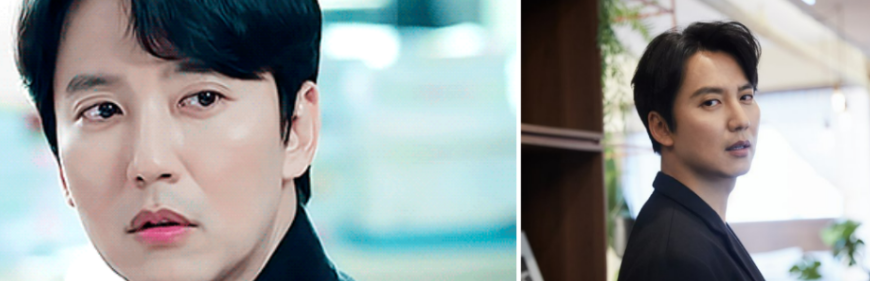

>저는 위의 사진 2개를 준비했습니다.
사진 파일 형식은 JPG, JPEG, PNG 등 사진 형식이어야 합니다.

>## 2) 얼굴인식을 위한 XML 다운로드
>얼굴 인식을 위해 필요한 XML을 다운로드 합니다.
아래 두가지 파일을 다운받아주세요!

>https://raw.githubusercontent.com/kipr/opencv/master/data/haarcascades/haarcascade_frontalface_default.xml

>https://github.com/kipr/opencv/blob/master/data/haarcascades/haarcascade_eye.xml



>## 3) 분석 환경에 사진 파일 업로드
>사진 데이터와 xml파일 2개를 분석환경인 코랩 파일 목록에 업로드 합니다.
>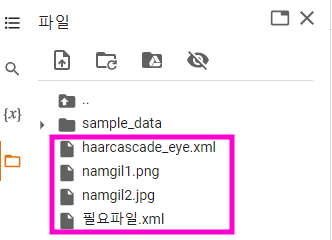

---

# 1. OpenCV 얼굴/눈 객체인식 캐스케이드 생성 및 이미지 데이터 읽기

이미지 속의 얼굴과 눈을 감지 하기 위해서는 OpenCV 캐스케이드 구성이 필요합니다.
OpenCV 캐스케이드는 정면 얼굴을 감지하고 눈을 감지하는 모듈입니다 :)



In [14]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


# 얼굴 및 눈 객체 인식 캐스케이드 생성
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('haarcascade_eye.xml')

print(face_cascade, eye_cascade)

< cv2.CascadeClassifier 0x7fe7daf65e30> < cv2.CascadeClassifier 0x7fe7daf64ef0>


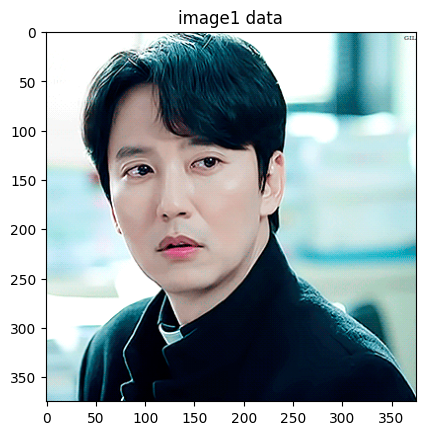

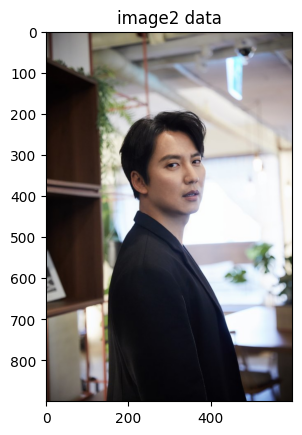

In [15]:
#이미지 불러오기
image1 = cv2.imread('namgil1.png')
image2 = cv2.imread('namgil2.jpg')

# RGB 컨버터 필요
image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)
image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)

# 이미지확인
plt.imshow(image1)
plt.title('image1 data')
plt.show()

plt.imshow(image2)
plt.title('image2 data')
plt.show()

In [17]:
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

얼굴좌표 :  46 73 171 171
얼굴좌표 :  245 252 176 176


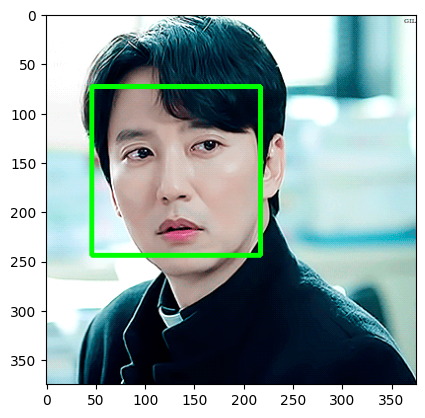

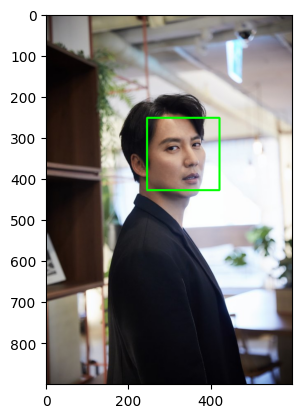

In [18]:
# 그레이 스케일 이미지 변환
image_gray1 = cv2.cvtColor(image1, cv2.COLOR_RGB2GRAY)
image_gray2 = cv2.cvtColor(image2, cv2.COLOR_RGB2GRAY)

# 얼굴 인식 파라미터 설정
faces1 = face_cascade.detectMultiScale(image_gray1, 1.1, 4)
faces2 = face_cascade.detectMultiScale(image_gray2, 1.1, 4)

# detectMultiScale() 바운딩 박스 좌표 획득
# 인자값 : 그레이이미지, 축소할 이미지배율인수, 이웃의 최소수
for(x,y,w,h) in faces1 :
  print("얼굴좌표 : ", x,y,w,h)
  cv2.rectangle(image1, (x,y), (x+w, y+h), (0,255,0), 3)

for(x,y,w,h) in faces2 :
  print("얼굴좌표 : ", x,y,w,h)
  cv2.rectangle(image2, (x,y), (x+w, y+h), (0,255,0), 3)

# 이미지 확인
plt.imshow(image1)
plt.show()

plt.imshow(image2)
plt.show()

# 3. 사진 속 얼굴의 눈 감지
﻿이번에는 얼굴 박스 안에 있는 눈 객체를 인식하는 코드를 진행합니다.

In [ ]:
# 눈 감지할 캐스케이드용 회색조 이미지 
roi_gray1 = image_gray1[y:(y+h), x:(x+w)]
roi_gray2 = image_gray2[y:(y+h), x:(x+w)]

# 눈 감지 박스의 컬러 이미지
roi_color1 = image1[y:(y+h), x:(x+w)]
roi_color2 = image2[y:(y+h), x:(x+w)]

#print(roi_gray)
#print(roi_color)

# 첫번째 사진 눈 변수 생성
eyes1 = eye_cascade.detectMultiScale(roi_gray1, 1.1, 2)   # 눈 박스 못찾는 경우, 파라미터값 조정 
index = 0
for (ex, ey, ew, eh) in eyes1:
  if index == 0:
    eye_1_1 = (ex, ey, ew, eh)
  elif index == 1:
    eye_1_2 = (ex, ey, ew, eh)

  # 눈 주변 박스 만들기
  cv2.rectangle(roi_color1, (ex, ey), (ex+ew, ey+eh), (0,0,255), 3)
  index1 = index+1


# 두번째 사진 눈 변수 생성
eyes2 = eye_cascade.detectMultiScale(roi_gray2, 1.1, 4)   # 눈 박스 못찾는 경우, 파라미터값 조정 
index = 0
for (ex, ey, ew, eh) in eyes2:
  if index == 0:
    eye_2_1 = (ex, ey, ew, eh)
  elif index == 1:
    eye_2_2 = (ex, ey, ew, eh)

  # 눈 주변 박스 만들기
  cv2.rectangle(roi_color2, (ex, ey), (ex+ew, ey+eh), (0,0,255), 3)
  index2 = index+1

#이미지 확인
plt.imshow(image1)
plt.show()

plt.imshow(image2)
plt.show()

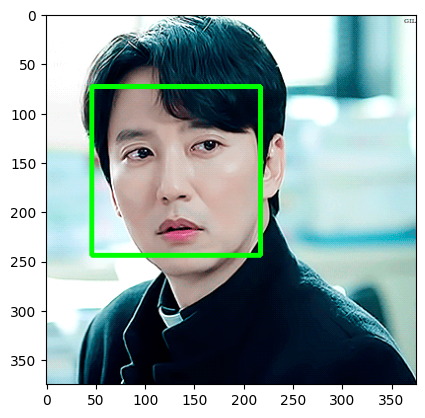

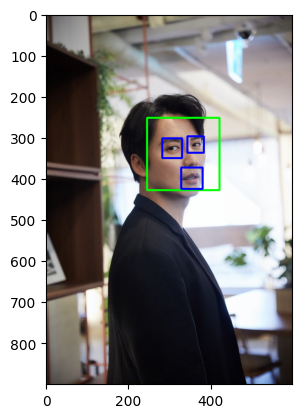

>첫번째 사진은 눈이 저렇게나 큰데 인식을 하지 못하고 두번째 사진은 눈과 입까지 인식을 해버렸네요 ㅋㅋ

> 눈 객체를 인식하지 못하는 경우에는 네모 친 부분의 파라미터 값을 1에 가까운 숫자로 조정해주시면 좋은데요! 조정해도 잘 못찾는 것 보니 모델 성능이 그닥 좋지 않군요..ㅎㅎㅎㅎ


# 4. 얼굴정렬(1) - 왼쪽 눈 정의

>두번째 사진에 대해서는 여차저차 눈을 인식하였으니,이 번에는 인식된 눈 중에 어떤 것이 '왼쪽 눈' 인지를 정의하겠습니다.


> 컴퓨터는 인식할 뿐이지 어떤 것이 왼쪽인지 모르니까요!


> 남길 배우의 실제 왼쪽 눈이 좀 더 작게 보이는데요!

>그럼 "오른쪽 눈보다 왼쪽 눈이 더 크기가 작다"라는 걸 컴퓨터에게 알려주면서 왼쪽눈을 정의하겠습니다.

>두번째 사진으로만 다시 작업할게요!
﻿

In [58]:
# 눈 감지할 캐스케이드용 회색조 이미지 
roi_gray = image_gray2[y:(y+h), x:(x+w)]

# 눈 감지 박스의 컬러 이미지
roi_color = image2[y:(y+h), x:(x+w)]

#print(roi_gray)
#print(roi_color)

# 첫번째 사진 눈 변수 생성
eyes = eye_cascade.detectMultiScale(roi_gray, 1.1, 2)   # 눈 박스 못찾는 경우, 파라미터값 조정 
index = 0

for (ex, ey, ew, eh) in eyes:
  if index == 0:
    eye_1 = (ex, ey, ew, eh)
  elif index == 1:
    eye_2 = (ex, ey, ew, eh)

  # 눈 주변 박스 만들기
  cv2.rectangle(roi_color, (ex, ey), (ex+ew, ey+eh), (0,0,255), 3)
  index = index+1 


In [59]:
# 더 작은 눈을 왼쪽눈으로 정의
if eye_1[0] < eye_2[0] : 
  left_eye = eye_1
  right_eye = eye_2

else:
  left_eye = eye_2
  right_eye = eye_1

print(left_eye, right_eye)

(37, 50, 48, 48) (98, 45, 40, 40)


# 5. 얼굴정렬(2) - 두 눈의 중심점을 선으로 연결하기

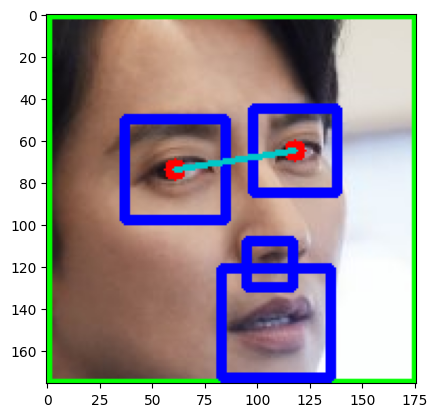

In [60]:
#두 눈 사이 중심 선으로 연결

left_eye_center = (int(left_eye[0] + (left_eye[2]/2)), int(left_eye[1] + (left_eye[3]/2)))
left_eye_x = left_eye_center[0]
left_eye_y = left_eye_center[1]

right_eye_center = (int(right_eye[0] + (right_eye[2]/2)), int(right_eye[1] + (right_eye[3]/2)))
right_eye_x = right_eye_center[0]
right_eye_y = right_eye_center[1]

cv2.circle(roi_color, left_eye_center, 5, (255,0,0), -1)
cv2.circle(roi_color, right_eye_center, 5, (255,0,0), -1)
cv2.line(roi_color, right_eye_center, left_eye_center,(0,200,200),2)

plt.imshow(roi_color)
plt.show()

# 6. 얼굴정렬(3) - 피타고라스 삼각형으로 선 사이 각도 계산

자 이제 피타고라스 삼각형을 이용해 각도를 계산합니다.

그리고 그 각도만큼 회전시켜서 눈의 위치를 수평선에 맞출거에요!



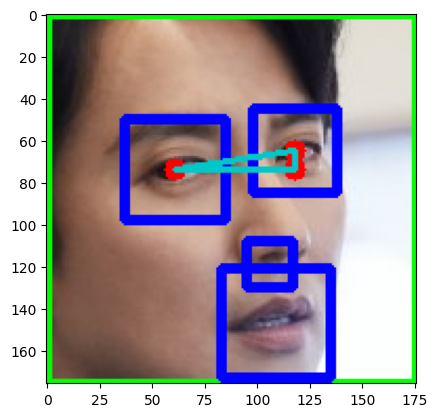

In [61]:
if left_eye_y > right_eye_y:
  A = (right_eye_x, left_eye_y)
  direction = -1

else:
  A = (left_eye_x, right_eye_y)
  direction = 1

cv2.circle(roi_color, A, 5, (255,0,0), -1)
cv2.line(roi_color, right_eye_center, left_eye_center, (0,200,200), 2)
cv2.line(roi_color, left_eye_center, A, (0,200,200), 2)
cv2.line(roi_color, right_eye_center, A, (0,200,200), 2)

plt.imshow(roi_color)
plt.show()

﻿
자 이렇게 결과로 보시면

눈을 이은 선이 대각선이 되는 피타고라스 삼각형이 나타납니다.

이 삼각형의 각도를 계산해줄게요!

﻿

In [63]:
delta_x = right_eye_x - left_eye_x
delta_y = right_eye_y - left_eye_y

angle = np.arctan(delta_y / delta_x)
angle = (angle * 180) / np.pi
print(angle)

-8.972626614896393


# ﻿7. 얼굴정렬(4) - 이미지 회전하여 눈 수평 맞추기

﻿
만약 남길오빠 기준 왼쪽 눈의 y좌표가 더 높다면 반시계 방향으로,

오른쪽 눈의 y좌표가 더 높다면 시계 방향으로 회전시켜야 해요!

﻿

﻿
왜, 왼쪽눈이 높이 있는데 반시계 방향으로 회전하냐! 그러면 더 올라가는 것 아니냐! 생각하실 수 있는데,

사진의 좌표를 보시면 세로축인 Y축의 시작점인 0이 아래가 아닌 왼쪽 위에서 시작해요!

﻿

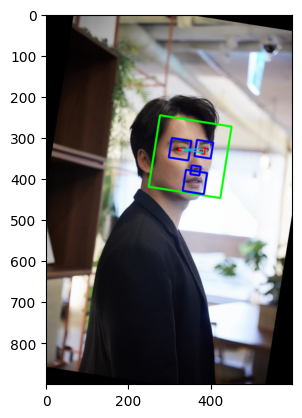

In [66]:
# 이미지 위치
height, width, _ = image2.shape

center = (width//2, height//2)

# 이미지 각도 회전 적용
M = cv2.getRotationMatrix2D(center, (angle), 1.0)

rotated = cv2.warpAffine(image2, M, (width, height))

plt.imshow(rotated)
plt.show()

﻿자 그럼 이렇게 눈의 수평을 맞추게끔 사진이 회전됩니다!